# Machine Intelligence II - Team MensaNord
## Sheet 08

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import numpy as np

## Exercise 1

In [2]:
def E(W, s):
    N = len(s)
    return -0.5 * np.sum(W[i, j] * s[i] * s[j] for i, j in np.ndindex(N, N))

In [3]:
N = 6
beta_0 = 0.007
tau = 1.06
epsilon = 1e-20
t_max = 150

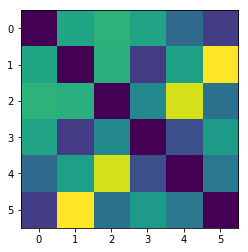

In [4]:
W = np.random.random(size=(N, N))
W = (W + W.T) / 2  # make symmetric
for i in range(N):
    W[i, i] = 0
    
plt.imshow(W)

### Simulation with M=1

In [35]:
M = 1
beta = beta_0
s = np.random.choice([-1, 1], N)

In [36]:
temperatures = np.zeros(t_max)
energies = np.zeros(t_max)

In [37]:
%%time
validation_min = E(W, s)

for t in range(t_max):
    for m in range(M):        
        i = np.random.randint(0, 6)
        s_local = np.copy(s)
        s_local[i] *= -1
        E_1 = E(W, s)
        E_2 = E(W, s_local)
        E_d = E_2 - E_1
        P = 1 / (1 + np.exp(beta*E_d))
        # print("\nt:", t, " i:", i, "\n s1:", s, "\tE1:", E_1, "\n s2:", s_local, "\tE2:", E_2)
        if np.random.random() < P:
            s = np.copy(s_local)
            # print("new s")
        if E(W, s) < validation_min:
            validation_min = E(W, s)
            
    temperatures[t] = 1 / beta
    energies[t] = E(W, s)
    beta *= tau

CPU times: user 40.4 ms, sys: 1.78 ms, total: 42.2 ms
Wall time: 40.6 ms


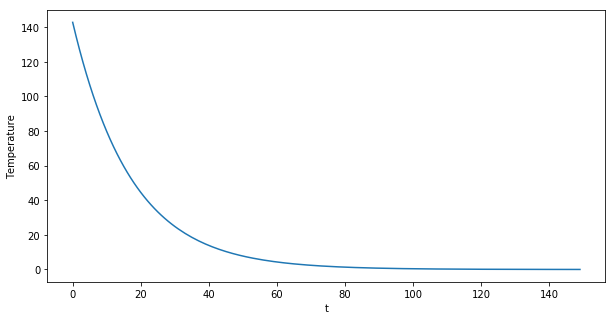

In [26]:
plt.figure(figsize=(10, 5))
plt.plot(temperatures)
plt.xlabel('t')
plt.ylabel('Temperature')

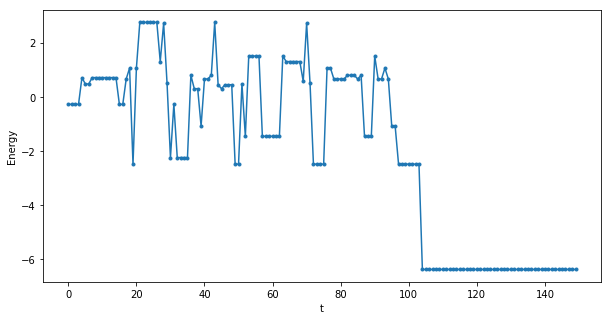

In [27]:
plt.figure(figsize=(10, 5))
plt.plot(energies, '.-')
plt.xlabel('t')
plt.ylabel('Energy')

In [28]:
s

array([1, 1, 1, 1, 1, 1])

### Simulation with M=500

In [38]:
M = 500
beta = beta_0
s = np.random.choice([-1, 1], N)

In [39]:
temperatures = np.zeros(t_max)
energies = np.zeros(t_max)

In [40]:
%%time

validation_min = E(W, s)

for t in range(t_max):
    for m in range(M):        
        i = np.random.randint(0, 6)
        s_local = np.copy(s)
        s_local[i] *= -1
        E_1 = E(W, s)
        E_2 = E(W, s_local)
        E_d = E_2 - E_1
        P = 1 / (1 + np.exp(beta*E_d))
        # print("\nt:", t, " i:", i, "\n s1:", s, "\tE1:", E_1, "\n s2:", s_local, "\tE2:", E_2)
        if np.random.random() < P:
            s = np.copy(s_local)
            # print("new s")
        if E(W, s) < validation_min:
            validation_min = E(W, s)
            
    temperatures[t] = 1 / beta
    energies[t] = E(W, s)
    beta *= tau

CPU times: user 14.5 s, sys: 45.8 ms, total: 14.5 s
Wall time: 14.5 s


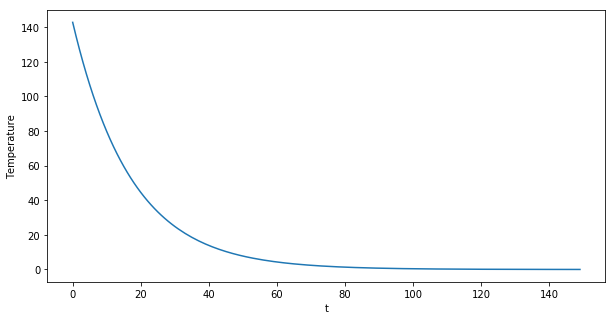

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(temperatures)
plt.xlabel('t')
plt.ylabel('Temperature')

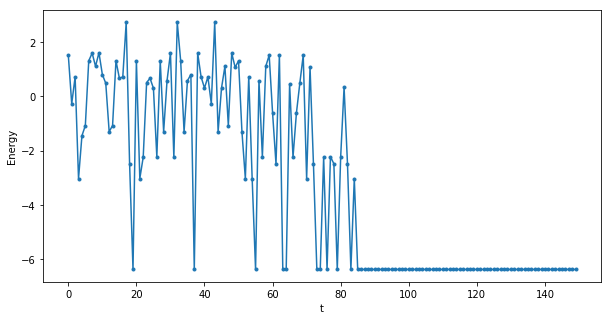

In [33]:
plt.figure(figsize=(10, 5))
plt.plot(energies, '.-')
plt.xlabel('t')
plt.ylabel('Energy')

In [34]:
s

array([1, 1, 1, 1, 1, 1])

### All possible states

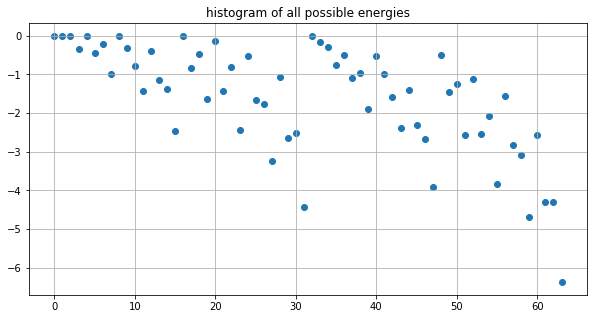

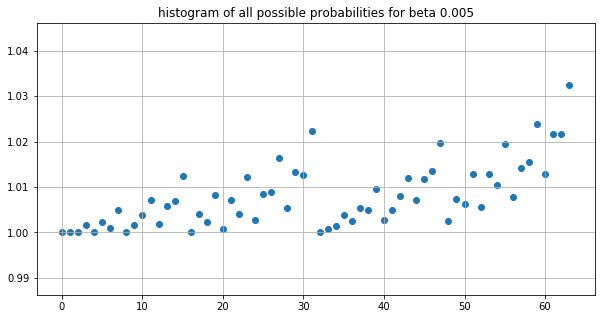

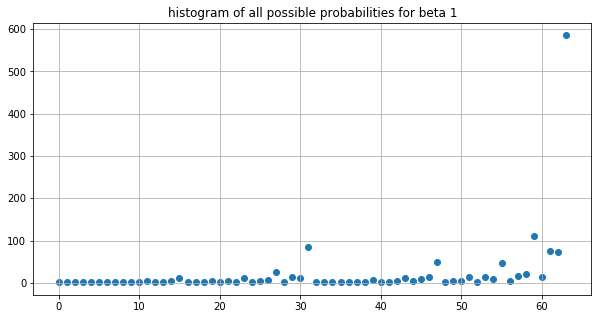

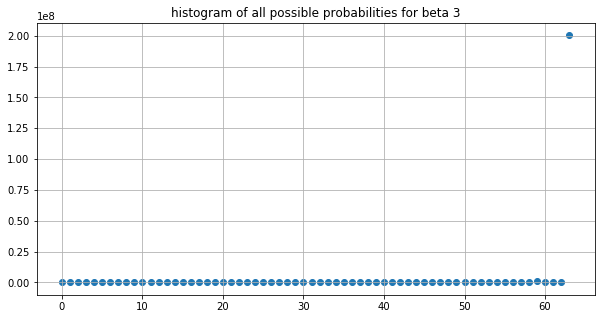

In [15]:
# generate all posible states & energies
all_states = [[0, 0, 0, 0, 0, 0] for i in range(2**6)]
all_energies = [0.0 for i in range(2**6)]
for si in range(2**6):
    all_states[si] = [int(x) for x in list('{0:06b}'.format(si))]
    all_energies[si] = E(W, all_states[si])

plt.figure(figsize=(10, 5))
plt.scatter(range(2**6), all_energies)
plt.title('histogram of all possible energies')
plt.grid()
plt.show()

probab_beta = [0.005, 1, 3]

for beta in probab_beta:
    Z = 0
    for en in all_energies:
        Z += np.exp(-beta * en)
    
    all_probabilities = [0.0 for i in range(2**6)]
    for si in range(2**6):
        all_probabilities[si] = np.exp(-beta * all_energies[si])
    
    plt.figure(figsize=(10, 5))
    plt.scatter(range(2**6), all_probabilities)
    plt.title('histogram of all possible probabilities for beta {}'.format(beta))
    plt.grid()
    plt.show()

## Exercise 2

In [41]:
# Other parameters and W from exercise 1.
epsilon = 1e-50

In [42]:
s = np.random.choice([-1., 1.], N)
e = np.zeros_like(s)
beta = beta_0

In [43]:
temperatures = np.zeros(t_max)
energies = np.zeros(t_max)

In [44]:
%%time

for t in range(t_max):
    #print('t =', t, '- beta =', beta)
    
    distance = np.inf
    while distance >= epsilon:
        e_old = e.copy()
        for i in range(N):
            neighbors = range(N)
            neighbors.remove(i)
            e[i] = -np.sum(W[i, j] * s[j] for j in neighbors)
            s[i] = np.tanh(-beta * e[i])
        #print(distance)
        distance = np.linalg.norm(e - e_old)
        
    temperatures[t] = 1 / beta
    energies[t] = E(W, s)
        
    beta *= tau
    #print('-'*10)

CPU times: user 17.6 ms, sys: 2.44 ms, total: 20.1 ms
Wall time: 18 ms


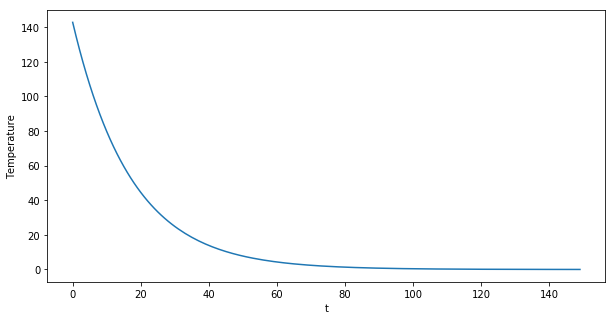

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(temperatures)
plt.xlabel('t')
plt.ylabel('Temperature')

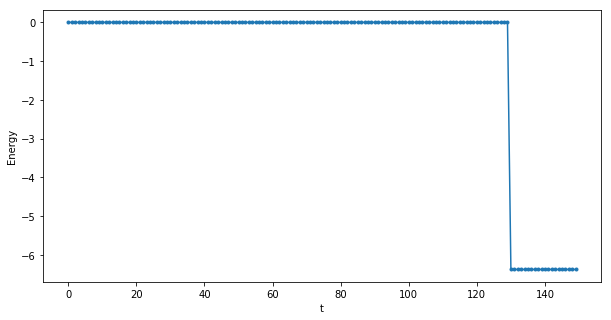

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(energies, '.-')
plt.xlabel('t')
plt.ylabel('Energy')

In [22]:
s

array([ 1.,  1.,  1.,  1.,  1.,  1.])

## Comparison

**Number of iterations until convergence:**

Simulated annealing converges more quickly (ca 105 iterations for M=1 and 85 iterations for M=500), mean-field annealing takes a bit longer (ca 130 iterations).

**Total runtime:**

Simulated annealing takes ca 40 ms for M=1 and 15 s for M=500. Mean-field annealing takes ca 18 ms. Therefore, simulated annealing is slower and depends heavily on the parameter M.

**Final result:**
As can be seen from the outputs above, the final state $s$ is the same for all methods ($s_i$ = 1 for all $i$).